In [2]:
#https://github.com/youssef-laouina/Predicting-Apartments-Prices-in-Buenos-Aires/tree/main
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import wqet_grader
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
def wrangle (filepath):
    #read csv file into data frame
    df=pd.read_csv(filepath)
    #Subset to the properties in place_with_parent_names
    mask_ba=df['place_with_parent_names'].str.contains('Capital Federal')
    #Subset to the properties in place_with_parent_names
    mask_apt=df['property_type']=='apartment'
    #Subset to the properties in price_approx_usd
    mask_price=df['price_aprox_usd']<400_000
    df=df[mask_ba & mask_apt & mask_price]

    #Remove outliers in surface_covered_in_m2
    low, high=df['surface_covered_in_m2'].quantile([0.1,0.9])
    mask_area=df['surface_covered_in_m2'].between(low,high)
    df=df[mask_area]
    return df

In [4]:
df=wrangle('data/buenos-aires-real-estate-1.csv')
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [5]:
assert(len(df)<=8606),f"df should not have no more than observations, not {len(df)}."

In [6]:
#df['property_type'].unique()
mask_ba=df['place_with_parent_names'].str.contains('Capital Federal')
mask_apt=df['property_type']=='apartment'
mask_price=df['price_aprox_usd']<400_000
df[mask_ba & mask_apt].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


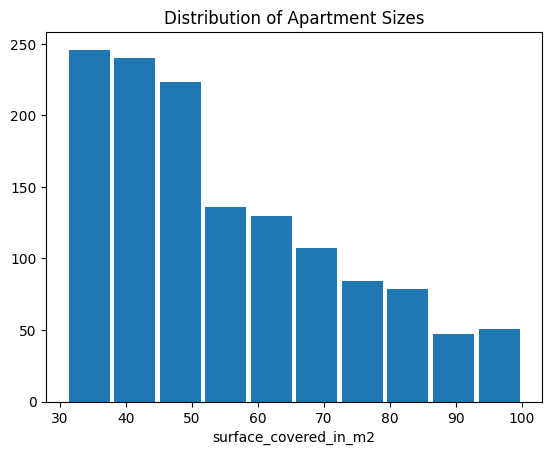

In [7]:
plt.hist(df['surface_covered_in_m2'], rwidth=0.9)
plt.xlabel('surface_covered_in_m2')
plt.title('Distribution of Apartment Sizes');

In [8]:
df['surface_covered_in_m2'].describe()
# low, high=df['surface_covered_in_m2'].quantile([0.1,0.9])
# mask_area=df['surface_covered_in_m2'].between(low,high)
# df[mask_area].head()

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

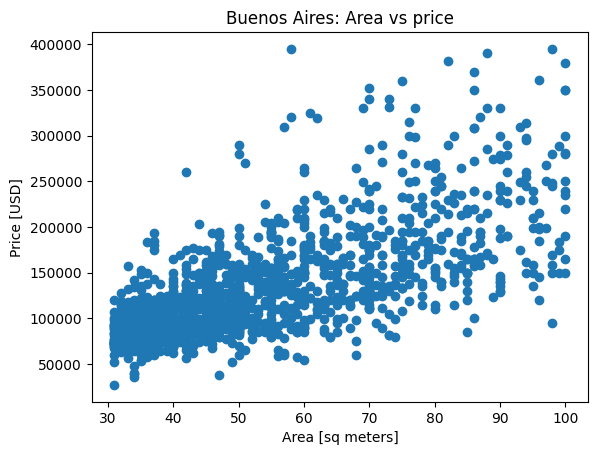

In [9]:
plt.scatter(x=df['surface_covered_in_m2'],y=df['price_aprox_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Buenos Aires: Area vs price');

In [10]:
df['price_aprox_usd'].corr(df['surface_covered_in_m2'])

0.6868188329865077

In [11]:
features=['surface_covered_in_m2']
X_train=df[features]
X_train.shape

(1343, 1)

In [32]:
target='price_aprox_usd'
y_train=df[target]



1343

In [25]:
y_mean=y_train.mean()
y_mean


135527.83871928515

In [26]:
y_pred_baseline=[y_mean]*len(y_train)
y_pred_baseline[:5]

[135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515,
 135527.83871928515]

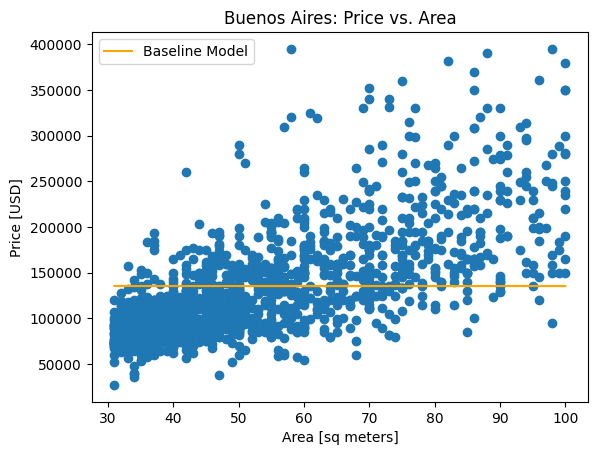

In [33]:
plt.plot(X_train.values,y_pred_baseline, color='orange', label='Baseline Model')
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [34]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


In [37]:
#instentiate the mmodel
model=LinearRegression()

In [38]:
assert isinstance(model, LinearRegression)

In [39]:
#fit the model with trained data
model.fit(X_train,y_train)

LinearRegression()

In [40]:
# Check the model work
check_is_fitted(model)

In [46]:
y_pred_training=model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [47]:
# find mean absolute error
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


In [49]:
intercept = round(model.intercept_,2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433.31


In [50]:
coefficient = round(model.coef_[0],2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


In [53]:
print(f"apt_price={intercept}+{coefficient}* surface_covered")

apt_price=11433.31+2253.12* surface_covered


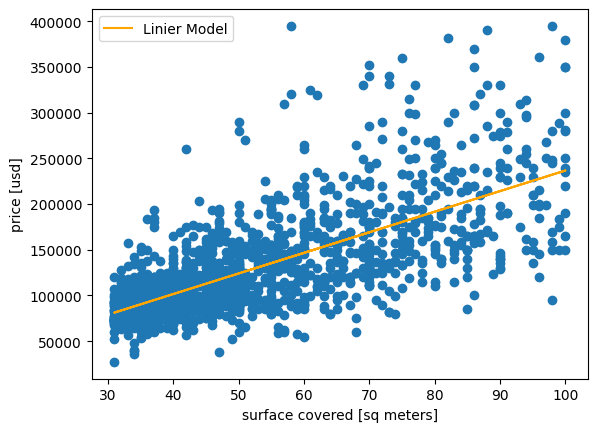

In [56]:
plt.plot(X_train.values,model.predict(X_train), color='orange', label='Linier Model')
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();